<a href="https://colab.research.google.com/github/mello-pedro/Data_Science_Projects/blob/main/C%C3%B3pia_de_Projeto1_Pedro_DSNP_AIRBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#### **Data Science - Beginner Project**
*by [Pedro Mello](https://github.com/mello-pedro)*

---

# Analysing data from Airbnb - Firenze

[Airbnb](https://www.airbnb.com.br/) is actually considered as the **biggest hotel enterprise in the world**. But, the curious thing about it is: **They don't own any hotel!**

As a frequent traveler I've stayed many times in AirBnb apartments, cause is cheaper than hotels and I feel really conected with the city and the people who live there.

So I decided to use AirBnb data on my first data science project because I really want to understand better the business, and help to improve the comunitty.

All the data analysed in this notebook came from the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html), the official data website of the AirBnb platform.

So after this brief introduction, let's go to the data and see the possible insights that we can extract with simple techniques.


## GETTING THE DATA

All the data used here I took from the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

For a simple exploratory analysis like this, I used only the data of
`listings.csv` - *Summary information and metrics for listings in Florence (good for visualisations).*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('http://data.insideairbnb.com/italy/toscana/florence/2022-06-11/visualisations/listings.csv', index_col='id')
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
85820,Salcio room in B&B La Martellina,470473,Claudio,NaN,Campo di Marte,43.76632,11.34166,Private room,104,2,15,2021-08-16,0.16,4,294,1,NaN
20078945,Casa Bonannia O,141678952,Summer In Italy,NaN,Gavinana Galluzzo,43.72672,11.28301,Entire home/apt,195,90,0,NaN,NaN,3,0,0,NaN
24469,Fortezza/City Centre Modern Apt 2+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78210,11.24392,Entire home/apt,80,2,1,2019-09-27,0.03,4,275,0,NaN
463942,BB Casa Schlatter Artist's Atelier. Room #3,2272298,Alessandra,NaN,Campo di Marte,43.78144,11.28003,Private room,70,3,9,2022-05-21,0.09,4,259,2,NaN
182984,"Central, quiet near the Old Bridge",877420,Filippo,NaN,Centro Storico,43.76554,11.25860,Entire home/apt,110,6,12,2022-04-28,0.12,1,232,4,NaN


## ANALYSING THE DATA

First of all, it's important to say that I'll not use all the variables of the dataset, cause at this moment they don't mean a lot to our analysis. So lets focus our attention on the following variables:

* `id` - number of the property id on AirBnb
* `name` - name of the property as announced
* `host_id` -  property's owner number of identification
* `host_name` - property's owner name
* `neighbourhood` - neighbourhood's name
* `room_type` - informs the type of room that is offered
* `price` - price of the rent per day
* `minimum_nights` - the minimum amount of nights in the property
* `number_of_reviews` - number of reviews the property has
* `availability_365` - number of days of availability within 365 days

**Continuing, let's create a new dataframe following this easy steps:** 

### 1- Knowing the names of all columns of the DataFrame

In [ ]:
df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

###2 - Using the pandas property 'info' to have a panoramic view of our DataFrame and understand simple things like null values, number of rows and variable types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10748 entries, 85820 to 18904652
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            10746 non-null  object 
 1   host_id                         10748 non-null  int64  
 2   host_name                       10748 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   10748 non-null  object 
 5   latitude                        10748 non-null  float64
 6   longitude                       10748 non-null  float64
 7   room_type                       10748 non-null  object 
 8   price                           10748 non-null  int64  
 9   minimum_nights                  10748 non-null  int64  
 10  number_of_reviews               10748 non-null  int64  
 11  last_review                     9019 non-null   object 
 12  reviews_per_month        

###3- Calculating the frequency of the null values and their possible impact on our Data

In [ ]:
df.isnull().sum() / df.shape[0] * 100

name                                0.018608
host_id                             0.000000
host_name                           0.000000
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        16.086714
reviews_per_month                  16.086714
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                            91.970599
dtype: float64

**As we can see clearly, we have 100% of null values on Column 'neighbourhood_group ' and almost 100% of null values on Column 'license'.
At this time, as a beginner, I'll drop this columns cause they don't impact my analysis.
But, it doesn't mean that we have to remove a column all the times when we see empty values on that.**

##After this first analysis, let's finally create our new and definitive DataFrame:

In [ ]:
new_df = df[['name', 'host_id', 'host_name', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365']]
new_df.head()

,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
id,,,,,,,,,
85820,Salcio room in B&B La Martellina,470473,Claudio,Campo di Marte,Private room,104,2,15,294
20078945,Casa Bonannia O,141678952,Summer In Italy,Gavinana Galluzzo,Entire home/apt,195,90,0,0
24469,Fortezza/City Centre Modern Apt 2+2,99178,Benedetta And Lorenzo,Centro Storico,Entire home/apt,80,2,1,275
463942,BB Casa Schlatter Artist's Atelier. Room #3,2272298,Alessandra,Campo di Marte,Private room,70,3,9,259
182984,"Central, quiet near the Old Bridge",877420,Filippo,Centro Storico,Entire home/apt,110,6,12,232


##Identifying/Cleaning OUTLIERS

At this stage we will analyse the statistic distribution of our dataset, make some boxplots and calculate the limits using the IQR SCORE;

The IQR SCORE means the relation between the third quartile(75%) and the first one(25%), represented by the expression (I'm using the 'price' variable as example):

**IQR_SCORE = Q3 - Q1**

SUP_PRICE = Q3 + 1.5 * IQR_SCORE

INF_PRICE = Q1 - 1.5 * IQR_SCORE

In [ ]:
new_df.describe().round(1)

,host_id,price,minimum_nights,number_of_reviews,availability_365
count,10748.0,10748.0,10748.0,10748.0,10748.0
mean,106397595.6,188.1,4.5,53.6,160.2
std,125047070.4,453.4,27.2,87.9,120.0
min,15651.0,9.0,1.0,0.0,0.0
25%,12116818.0,70.0,1.0,2.0,39.0
50%,46615891.0,108.0,2.0,14.0,161.0
75%,165397794.5,189.0,3.0,67.0,272.0
max,463404839.0,13375.0,1120.0,894.0,365.0


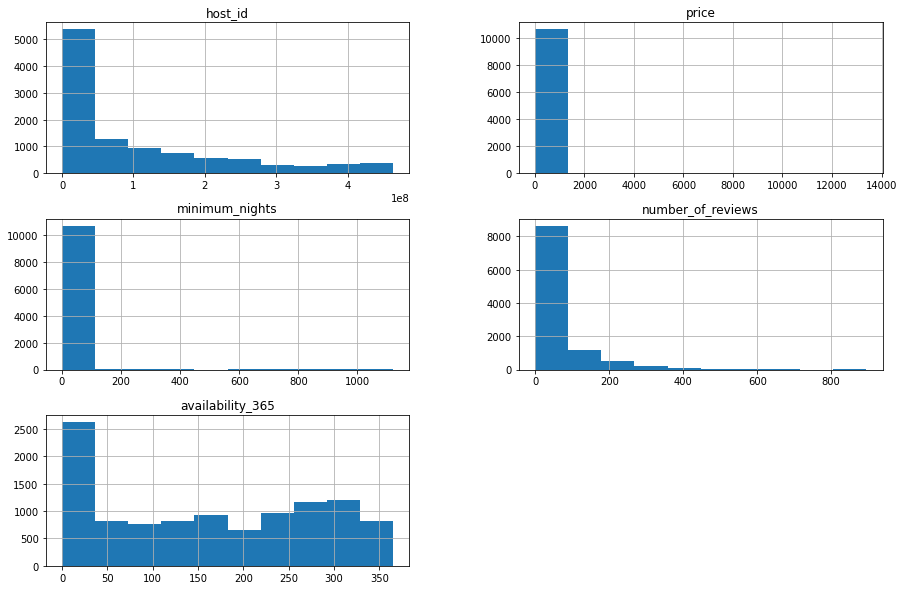

In [ ]:
new_df.hist(figsize=(15,10));

###WHAT KIND OF INSIGHTS CAN WE EXTRACT FROM THE DATA ABOVE?

* The MIN value of **Price** = 9.00 Dolars and the MAX value = 13,375.00 Dolars(!!!!!).
* The MIN value of **Minimum_nights** = 1 night and the MAX value = 1,120 Nights (!!!!!).
* There is a large gap between price's MEAN and MEDIAN. The same happens with the variable **Minimum_nights**.
* The gap is even larger between MEDIAN and MAX values of **price** and **minimum_nights**. So, as we can see clearly, we have some **OUTLIERS** here.
* The grafic distribution confirms that we really have some outliers.

### Let's treat the OUTLIERS!

In [ ]:
##FIRST FOR THE VARIABLE PRICE
q1_price = new_df.price.quantile(.25)
q3_price = new_df.price.quantile(.75)
iqr_price = q3_price - q1_price
print("Price's IQR SCORE: ", iqr_price)

##setting the limits
sup_price = q3_price + 1.5 * iqr_price
inf_price = q1_price - 1.5 * iqr_price
print("Price's superior limit is: ", sup_price)
print("Price's inferior limit is: ", inf_price)

Price's IQR SCORE:  119.0
Price's superior limit is:  367.5
Price's inferior limit is:  -108.5


In [ ]:
##THEN THE VARIABLE MINIMUM NIGHTS
q1_nights = new_df.minimum_nights.quantile(.25)
q3_nights = new_df.minimum_nights.quantile(.75)
iqr_nights = q3_nights - q1_nights
print("Minimum nights IQR SCORE: ", iqr_nights)

##setting the limits
sup_nights = q3_nights + 1.5 * iqr_nights
inf_nights = q1_nights - 1.5 * iqr_nights
print("Minimum nights superior limit is: ", sup_nights)
print("minimum nights inferior limit is: ", inf_nights)

Minimum nights IQR SCORE:  2.0
Minimum nights superior limit is:  6.0
minimum nights inferior limit is:  -2.0


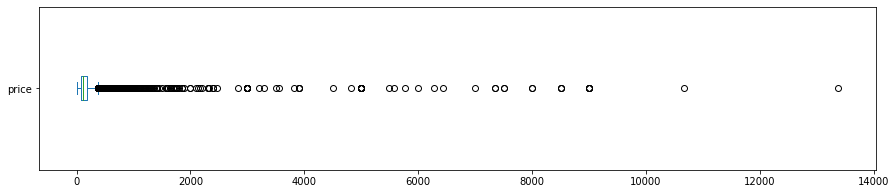

In [ ]:
##BOXPLOTS TO SEE THE DISTRIBUTION OF THESE OUTLIERS
new_df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show();

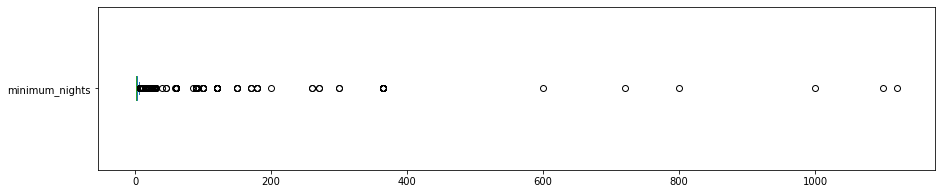

In [ ]:
new_df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show();

In [ ]:
##CLEANING THE NUMBERS BASED ON THE LIMITIS DETERMINED ABOVE
new_df_clean = new_df.copy()
new_df_clean.drop(new_df_clean[new_df_clean.price > 368].index, axis=0, inplace=True)
new_df_clean.drop(new_df_clean[new_df_clean.minimum_nights > 6].index, axis=0, inplace=True)

In [ ]:
print('shape before the cleaning: ', new_df.shape)
print('shape after the cleaning: ', new_df_clean.shape)

shape before the cleaning:  (10748, 9)
shape after the cleaning:  (9308, 9)


In [ ]:
##SEEING THE NEW DISTRIBUTION AFTER THE DATA CLEANING PROCESS
new_df_clean.describe().round(1)

,host_id,price,minimum_nights,number_of_reviews,availability_365
count,9308.0,9308.0,9308.0,9308.0,9308.0
mean,105415676.5,124.4,2.0,58.1,159.4
std,123479871.1,76.3,1.0,91.6,119.6
min,33210.0,9.0,1.0,0.0,0.0
25%,12257317.0,70.0,1.0,3.0,37.0
50%,47819180.5,100.0,2.0,18.0,161.0
75%,162377960.2,160.0,2.0,74.0,272.0
max,463404839.0,368.0,6.0,894.0,365.0


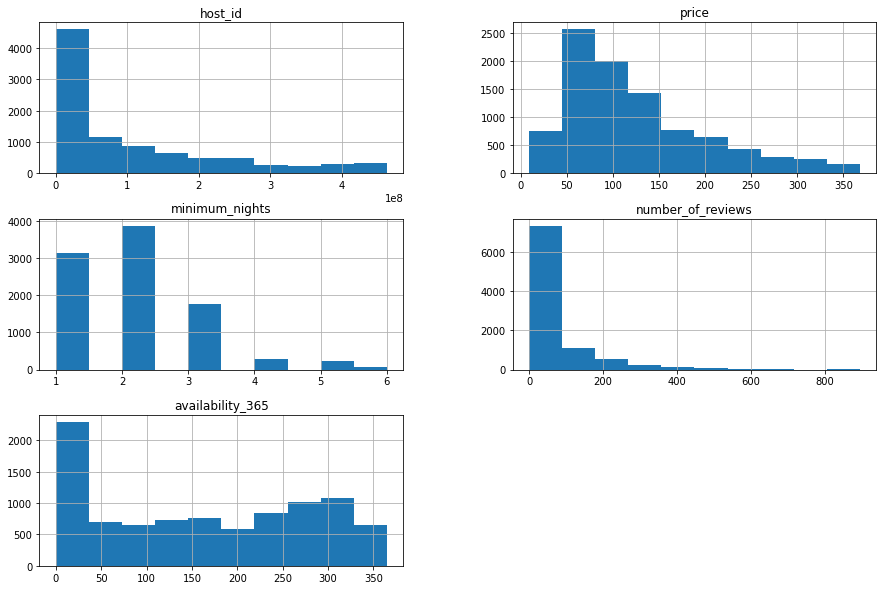

In [ ]:
new_df_clean.hist(figsize=(15,10));

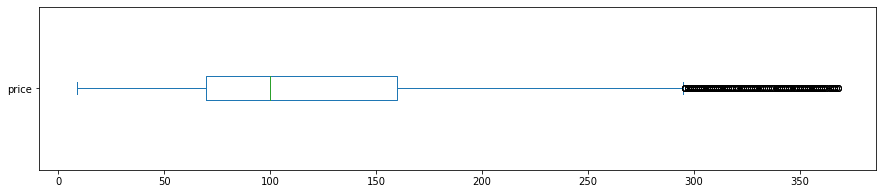

In [ ]:
new_df_clean.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show();

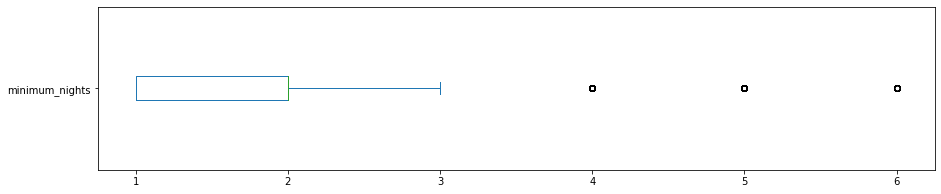

In [ ]:
new_df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show();

#*NOW WE CAN FINALLY ANSWER SOME QUESTIONS ABOUT OUR DATASET AND THE CITY OF FLORENCE*!


## --> **And the first question is: What type of room is the most rented in Florence? And the less rented is??**


In [ ]:
new_df_clean.room_type.value_counts(ascending=False)

Entire home/apt    7203
Private room       1931
Hotel room          139
Shared room          35
Name: room_type, dtype: int64

###As we can see, **people prefer to rent an entire home/apt on Florence**.
On the other hand, shared rooms are not the preference of the travelers at this destination OR the city doesn't have much options of this type of acomodation.



##--> What is the most expensive neighbourhood on Florence?

In [ ]:
round(new_df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False))

neighbourhood
Centro Storico       136.0
Gavinana Galluzzo    119.0
Campo di Marte        95.0
Isolotto Legnaia      85.0
Rifredi               82.0
Name: price, dtype: float64

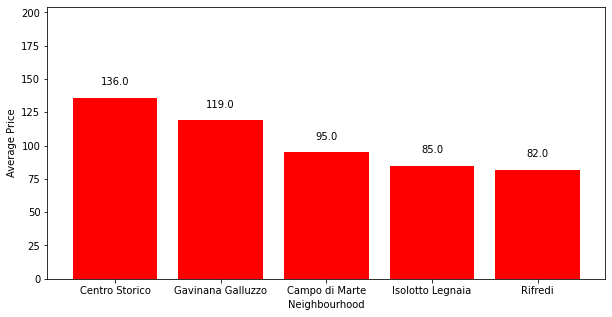

In [ ]:
df_exp = round(new_df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False))
plt.figure(figsize = (10,5))
plt.bar(data = df_exp, x = df_exp.index, height = df_exp.values, width = 0.8, color = 'red')
plt.ylim(0,df_exp.values.max()*1.5)
plt.ylabel("Average Price")
plt.xlabel("Neighbourhood")
for i in range(len(df_exp)):
    position = df_exp.index[i]
    height = df_exp.values[i]+df_exp.values.max()*0.07
    text = str(df_exp.values[i])
    plt.text(position,height,text,ha = 'center')
plt.show()

**Florence's most expensive neighbourhood - on average - is the Centro Storico.**

##-->How many nights on average does a person spend in florence?

In [ ]:
nights_mean = new_df_clean.minimum_nights.mean()
print('People spend, on average, ', round(nights_mean),'nights in the city of Florence!')

People spend, on average,  2 nights in the city of Florence!


##-->How many neighbourhoods are listed on DataFrame?

In [ ]:
neighb_number = str(len(new_df_clean.neighbourhood.value_counts()))
print('The number of Neighbourhoods avaiable on our DataFrame is ', neighb_number, 'Neighbourhoods')

The number of Neighbourhoods avaiable on our DataFrame is  5 Neighbourhoods


##-->What is the percentage of rooms avaiable in each neighbourhood of Florence? 

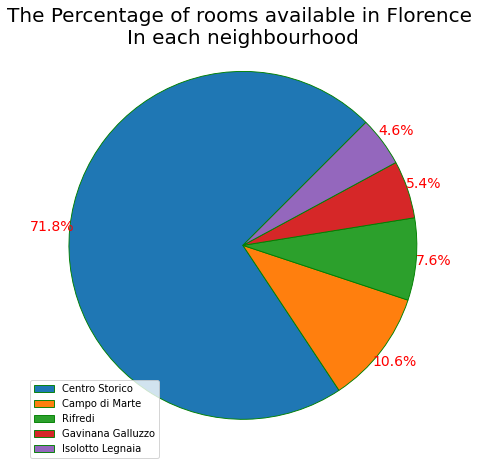

In [ ]:
plt.figure(figsize = (10,8))
df_neighb = new_df_clean['neighbourhood'].value_counts()
plt.pie(df_neighb, startangle = 45, autopct = '%1.1f%%', wedgeprops = {'linewidth':0.9, 'edgecolor':'green'}, pctdistance = 1.1,  textprops  = {'color' : 'red', 'fontsize':14})
plt.legend(labels = df_neighb.index,loc = 'lower left')
plt.title("The Percentage of rooms available in Florence \nIn each neighbourhood",y = 0.95, fontsize = 20)
plt.show()